In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset

In [2]:
df = getNormalizedDataset()
df.shape

(230396, 18)
(230060, 18)
(230041, 18)
(220417, 19)


(220417, 21)

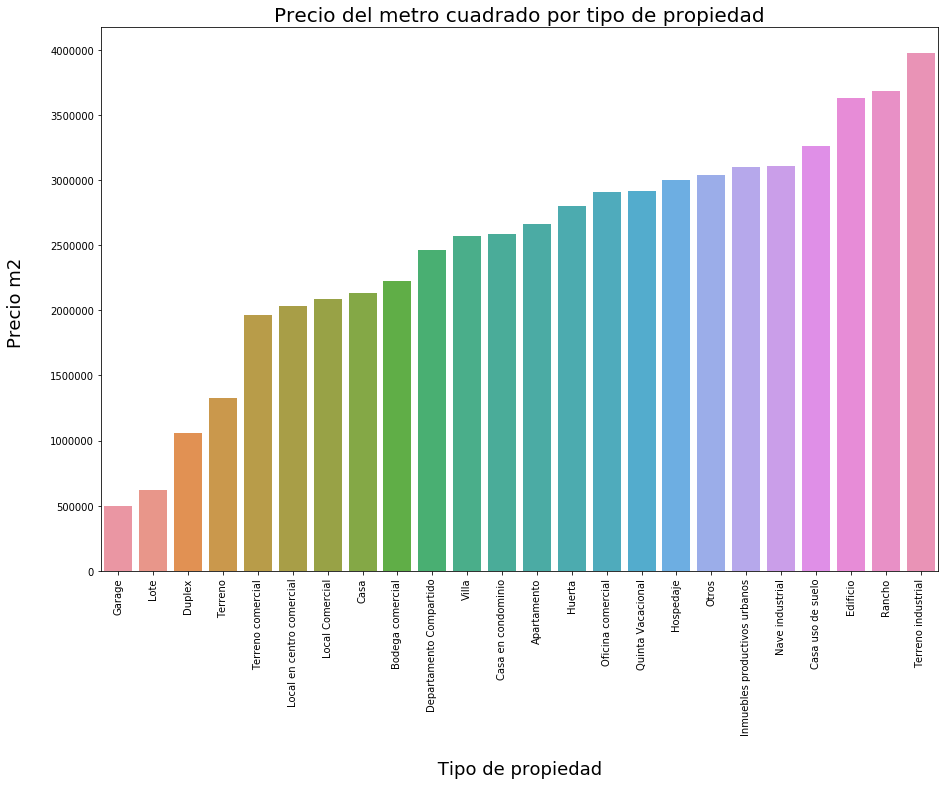

In [3]:
plt.figure(figsize=(15,10))

df2 = df.copy()



df_provs = df2.groupby('tipodepropiedad').precio.mean().reset_index()

df_provs.sort_values(by='precio', inplace=True)

df_provs = df_provs.reset_index(drop=True)

df_provs['tipodepropiedad'] = df_provs['tipodepropiedad'].astype(str)


ax = sns.barplot(data=df_provs, x='tipodepropiedad', y='precio')

ax.set_title('Precio del metro cuadrado por tipo de propiedad', fontdict={'fontsize':20})
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.set_xlabel('\n Tipo de propiedad ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [4]:
# Es interesante tambien ver matrices de correlacion por tipo de propiedad.
corr = df.corr()
corr

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,precio_dolar,extras
antiguedad,1.00,0.19,-0.01,-0.00,0.11,0.03,-0.07,-0.07,-0.10,0.09,0.08,0.06,0.06,0.06,-0.06
habitaciones,0.19,1.00,0.34,0.52,0.46,0.19,0.03,0.04,0.03,0.08,0.06,0.21,0.09,0.21,0.30
garages,-0.01,0.34,1.00,0.36,0.26,0.09,0.04,0.12,0.09,0.12,0.15,0.22,0.17,0.22,0.88
banos,-0.00,0.52,0.36,1.00,0.54,0.33,0.10,0.11,0.11,0.04,0.03,0.42,0.24,0.42,0.37
metroscubiertos,0.11,0.46,0.26,0.54,1.00,0.76,0.05,0.06,0.05,-0.01,-0.02,0.64,0.20,0.64,0.25
metrostotales,0.03,0.19,0.09,0.33,0.76,1.00,0.01,0.02,0.05,-0.06,-0.08,0.56,-0.04,0.56,0.09
gimnasio,-0.07,0.03,0.04,0.10,0.05,0.01,1.00,0.38,0.35,0.20,0.12,0.19,0.21,0.19,0.40
usosmultiples,-0.07,0.04,0.12,0.11,0.06,0.02,0.38,1.00,0.33,0.19,0.22,0.18,0.20,0.18,0.45
piscina,-0.10,0.03,0.09,0.11,0.05,0.05,0.35,0.33,1.00,0.17,0.17,0.15,0.12,0.15,0.45
escuelascercanas,0.09,0.08,0.12,0.04,-0.01,-0.06,0.20,0.19,0.17,1.00,0.79,0.03,0.07,0.03,0.22


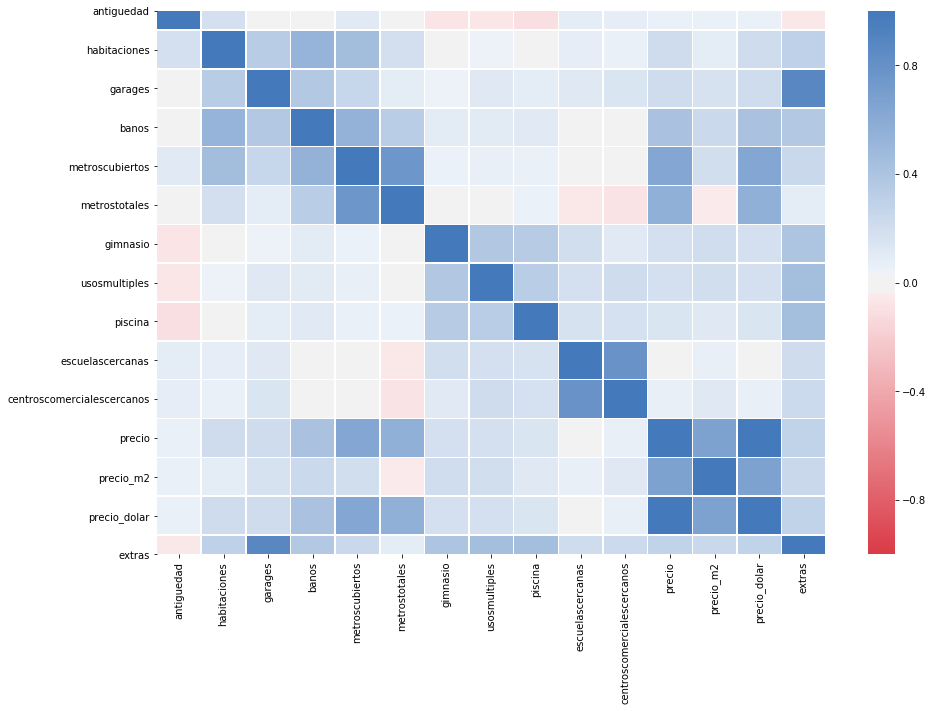

In [5]:
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=cmap,
            #annot=True,
            linewidth=0.5,
           vmin=-1,
           vmax=1)


# De este grafico se observa:
# Las correlaciones negativas no son muchas. Principalmente en la antiguedad.
# A menor antiguedad pareceria que hay menor cantidad de extras.
# El precio se ve influenciado principalmente por los metros cubiertos y totales y por la cantidad de baños y habitaciones.
# El resto, no parecen ser lo suficientemente fuerte como para llamar la atencion.

Text(0.5, 1, 'Apartamentos \n')

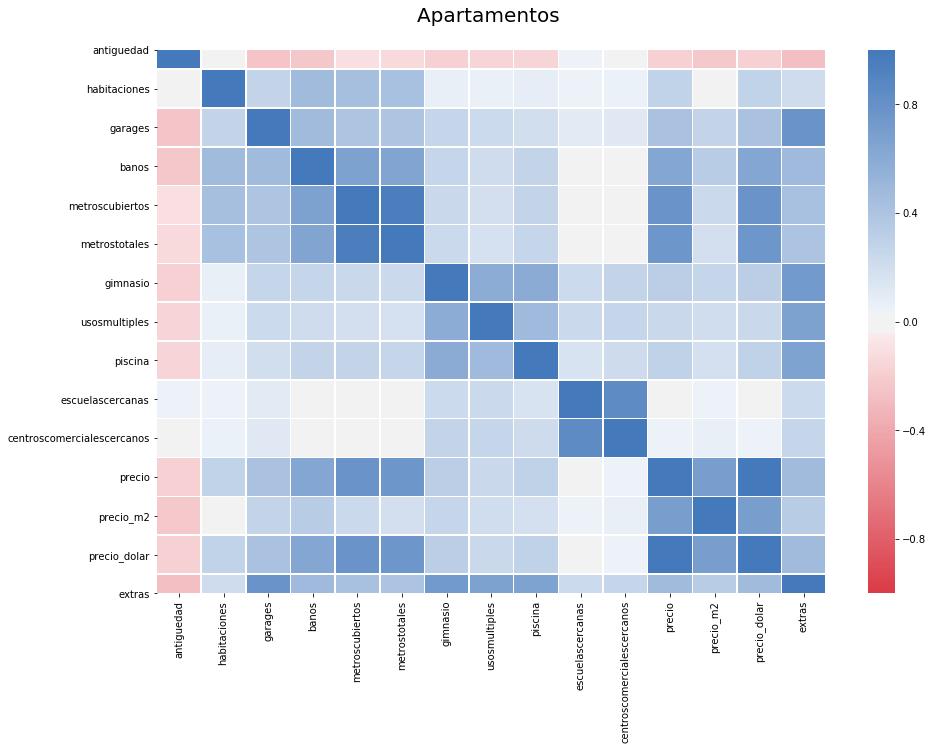

In [6]:
# Y si miro las correlaciones para grupos particulares? Por ejemplo tipos de propiedad?
corr = df[df['tipodepropiedad']=='Apartamento'].corr()
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=cmap,
            #annot=True,
            linewidth=0.5,
           vmin=-1,
           vmax=1)

ax.set_title('Apartamentos \n', fontdict={'fontsize':20})

# En los apartamentos, se ve que la correlacion entre la antiguedad y la mayoria de campos (entre ellos el precio) es negativa
# Esto significa que si aumenta la antiguedad, disminuye el precio y los otros campos.

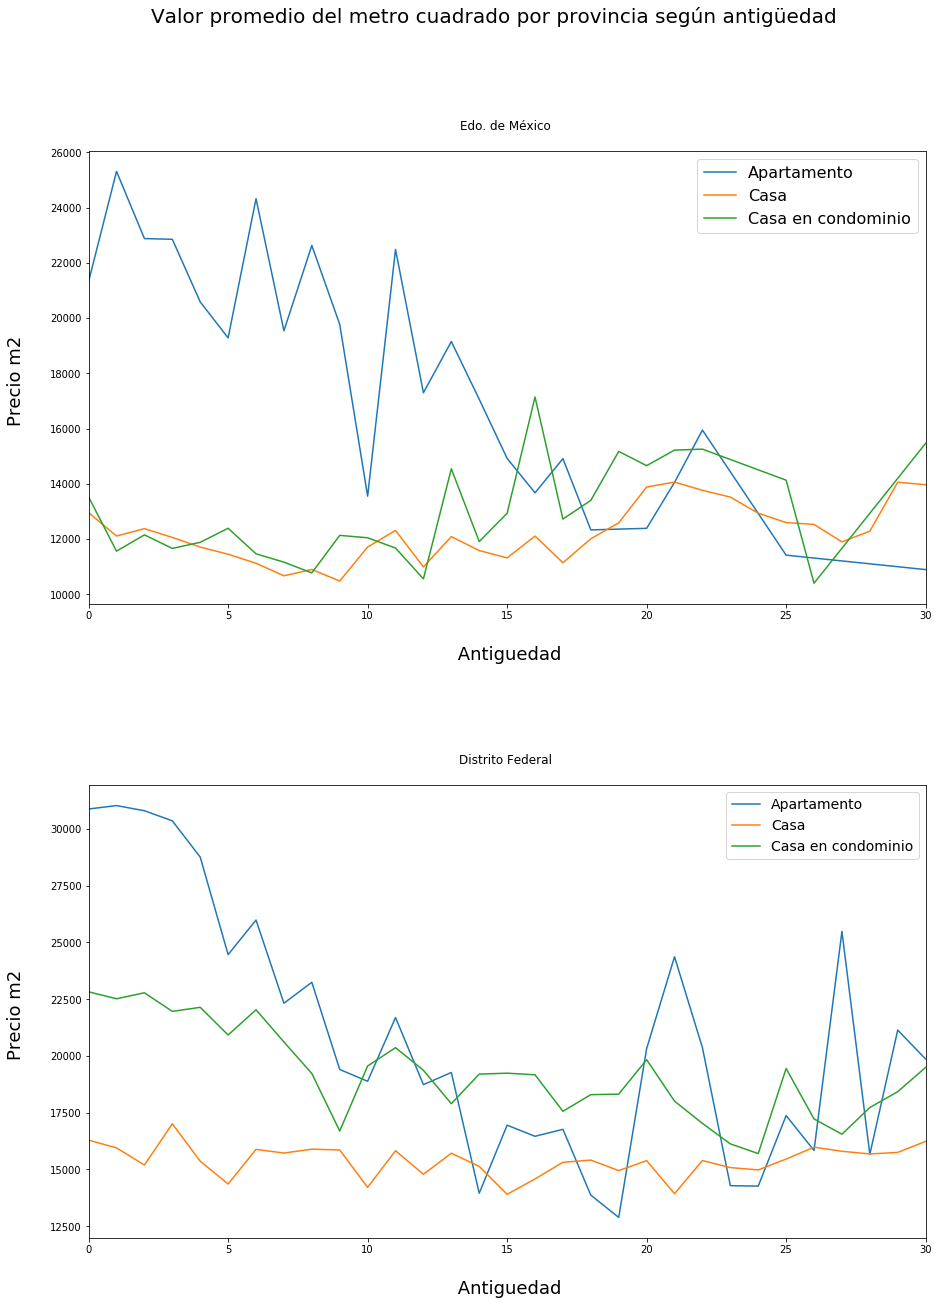

In [7]:
# Influye la antiguedad en el valor de las casas?
# Tomo datos agrupando por antiguedad, tipo de propiedad y provincia. 
# Filtro aquellos grupos donde la cantidad no es suficiente como para hacer un analisis consistente
# Armo un grafico para cada provincia, comparando los tipos de propiedad

df2 = df.copy()

df2 = df2.groupby(['antiguedad','tipodepropiedad','provincia']).filter(lambda x: len(x)>5).groupby(['antiguedad','tipodepropiedad','provincia']).agg({'precio_m2':'mean'})

df2 = df2.reset_index()

df2.dropna(subset=['precio_m2'], inplace=True)

fig,(ax1,ax2) = plt.subplots(2,1, figsize=(15,20))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado por provincia según antigüedad',fontsize=20)

for name in ['Apartamento','Casa', 'Casa en condominio']:
    
    ax1.plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].precio_m2,\
            label=name)
    ax1.set_title('Edo. de México \n')

    ax2.plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].precio_m2,\
            label=name)
    ax2.set_title('Distrito Federal \n')

    ax1.set_xlim([0,30])
    ax2.set_xlim([0,30])

    
ax1.set_xlabel("\n Antiguedad", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', fontsize=16)
ax2.set_xlabel("\n Antiguedad", fontsize=18)
ax2.set_ylabel("Precio m2 \n", fontsize=18)
ax2.legend(loc='best', fontsize=14)


In [8]:
df.groupby('provincia').describe()['precio_m2']
#ciudad_promedio_preciom2_similar = ['Edo. de México','Guerrero','Jalisco','Nuevo León']


,count,mean,std,min,25%,50%,75%,max
provincia,,,,,,,,
Aguascalientes,1512.00,7544.40,3228.36,1300.05,5250.00,7222.22,9353.12,25944.44
Baja California Norte,2903.00,5650.61,2772.07,972.22,3974.36,5000.00,6559.94,41138.89
Baja California Sur,1470.00,6306.52,4111.22,987.65,3667.72,5190.15,8000.00,45312.50
Campeche,169.00,7201.78,4492.62,1280.00,3800.00,6053.92,10344.83,29000.00
Chiapas,895.00,10100.10,5022.72,1000.00,6230.72,9752.48,13750.00,29891.30
Chihuahua,3817.00,7368.89,8220.45,816.33,4344.26,6750.00,9500.00,455555.56
Coahuila,3136.00,6363.14,2663.96,900.00,4419.75,6144.35,8000.00,22727.27
Colima,791.00,6932.02,4470.57,1000.00,3912.09,5980.86,8888.89,52459.02
Distrito Federal,31083.00,20944.92,10469.65,875.00,13043.48,19047.62,26386.87,58823.53


In [9]:
# Del grafico anterior, se puede observar:
# En ambas ciudades, los precios de los apartamentos van disminuyendo, a la vez que aumenta la antiguedad
# En el caso de las casas, los precios parecen no verse afectados por la antiguedad, pudiendo tener menos o mas valor
# La diferencia de precios, parece verse mas evidente a partir de los 10 años de antiguedad, no asi en los primeros 5.
# No es un dato menor que vaya disminuyendo pero a la vez siga habiendo picos. Si bien es un dato que influye,
# pueden existir casas mas antiguas de mayor valor.

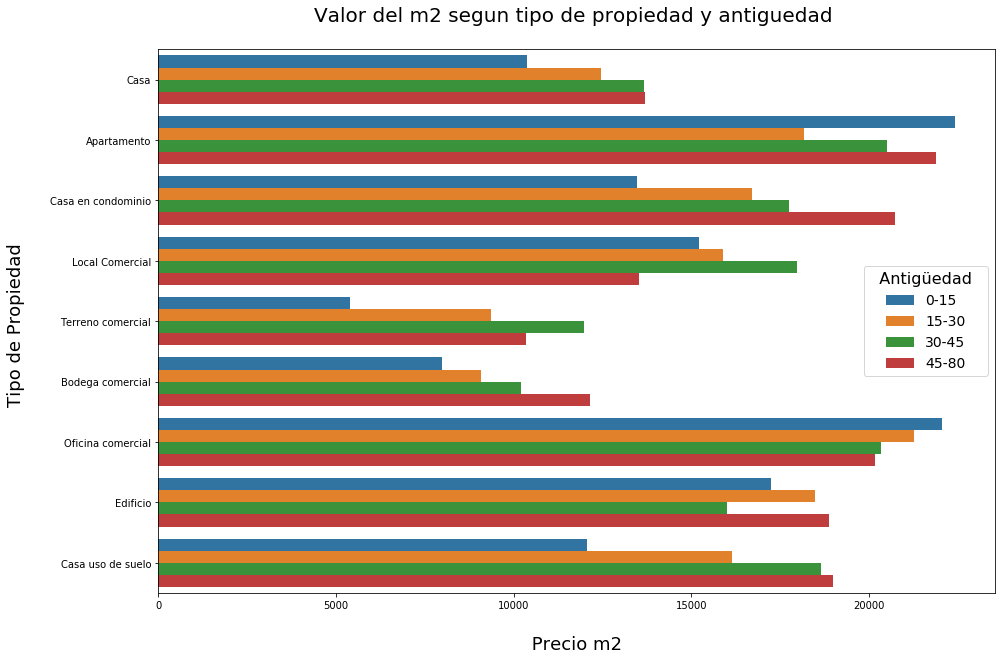

In [10]:
# Se tomn las 10 provincias con mas casas y los 20 tipos de propiedades mas comunes.
# Se evalua el precio del metro cuadrado para cada tipo de propiedad en una provincia distinta

df3 = df.copy()

df3['rango_antiguedad'] = pd.cut(df['antiguedad'],\
                                 bins=[-1,15,30,45,80],\
                                 labels=['0-15', '15-30', '30-45', '45-80'])

top_10_tipos_mas_comunes = df3.groupby('tipodepropiedad').size().sort_values(ascending=False)[0:10]
top_10_tipos_mas_comunes = list(top_10_tipos_mas_comunes.index)
top_10_tipos_mas_comunes.remove('Terreno')

plt.figure(figsize=(15,10))
data = df3.groupby(['rango_antiguedad','tipodepropiedad']).agg({'precio_m2':'mean'})
data = data.reset_index()

data = data.loc[data['tipodepropiedad'].isin(top_10_tipos_mas_comunes),:]

data.tipodepropiedad.cat.remove_unused_categories(inplace=True)

pivot = data.pivot(index='tipodepropiedad', columns='rango_antiguedad', values='precio_m2')

mask = pivot.isnull()
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#ax = sns.heatmap(pivot, cmap="YlGnBu")


ax = sns.barplot(data=data, y='tipodepropiedad', x='precio_m2', hue='rango_antiguedad', order=top_10_tipos_mas_comunes)

ax.set_xlabel('\n Precio m2 ', fontsize=18)
ax.set_ylabel('Tipo de Propiedad \n', fontsize=18)
ax.set_title('Valor del m2 segun tipo de propiedad y antiguedad \n', fontdict={'fontsize':20})
plt.legend(title='  Antigüedad  ', title_fontsize=16, fontsize=14, loc='center right')

#ax.set_facecolor('xkcd:grey')


# De este grafico, se puede sacar como informacion:
# Los tres tipos de casas, tienden a incrementar levemente su valor.
# Los apartamentos, y los edificios, tienden a decrementar levemente su valor.
# El resto presentan un comportamiento irregular, del que es dificil predecir algo.

In [11]:
# Caracteristicas principales de agrupar por habitaciones
# Las casas de mas habitaciones, son mucho mas viejas
# No es algo muy importante, pero es un dato curioso
df.groupby('habitaciones').mean()

,antiguedad,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,precio_dolar,extras
habitaciones,,,,,,,,,,,,,,
0.00,3.16,0.21,0.38,101.47,242.73,0.01,0.00,0.04,0.28,0.25,1683459.78,8807.03,86154.54,0.26
1.00,5.96,0.87,1.09,85.17,115.04,0.11,0.08,0.10,0.44,0.42,1440774.36,16520.43,73734.61,1.16
2.00,6.19,1.17,1.37,92.05,113.23,0.06,0.05,0.06,0.48,0.44,1336380.53,12893.10,68392.04,1.34
3.00,5.71,1.60,2.23,183.69,203.93,0.07,0.06,0.09,0.48,0.42,2333773.79,12982.35,119435.71,1.81
4.00,9.56,1.54,2.55,241.42,259.39,0.05,0.05,0.07,0.49,0.43,2783002.29,12925.38,142425.91,1.72
5.00,13.16,1.37,2.35,253.58,270.94,0.04,0.04,0.03,0.48,0.42,2516915.44,11980.23,128808.36,1.47
6.00,14.67,1.22,2.31,266.43,282.51,0.02,0.03,0.02,0.44,0.35,2441824.38,11882.35,124965.42,1.28
7.00,17.35,1.10,2.20,275.06,293.39,0.02,0.01,0.01,0.47,0.40,2717758.21,12775.39,139086.91,1.14
8.00,15.96,1.05,2.02,279.49,298.74,0.01,0.02,0.02,0.50,0.40,2699562.57,12443.80,138155.71,1.10


In [12]:
# Cantidad de tipos de propiedades
df.tipodepropiedad.value_counts()

Casa                             113601
Apartamento                       27930
Casa en condominio                15347
Terreno                            7910
Local Comercial                    1786
Terreno comercial                   950
Bodega comercial                    797
Oficina comercial                   795
Edificio                            526
Casa uso de suelo                   469
Duplex                              292
Villa                               124
Inmuebles productivos urbanos       110
Local en centro comercial           102
Departamento Compartido              96
Otros                                59
Quinta Vacacional                    34
Nave industrial                      32
Rancho                                5
Terreno industrial                    5
Lote                                  4
Huerta                                1
Hospedaje                             0
Garage                                0
Name: tipodepropiedad, dtype: int64

In [13]:
# Provincias mas grandes
df.groupby(['ciudad']).size().sort_values()[-10:]

ciudad
Guadalajara              3296
Puebla                   3681
Atizapán de Zaragoza     3752
Naucalpan de Juárez      4575
Mérida                   5076
Monterrey                5272
Benito Juárez            5531
San Luis Potosí          5873
Zapopan                  8724
Querétaro               10484
dtype: int64

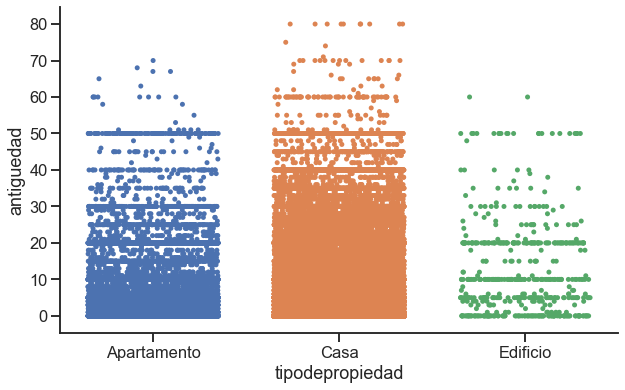

In [14]:

plt.figure(figsize=(10, 6))

sns.set(style='ticks', context='talk')

sns.stripplot(x='tipodepropiedad', y='antiguedad', data=df, order=['Apartamento','Casa','Edificio'], jitter=0.35)
sns.despine()

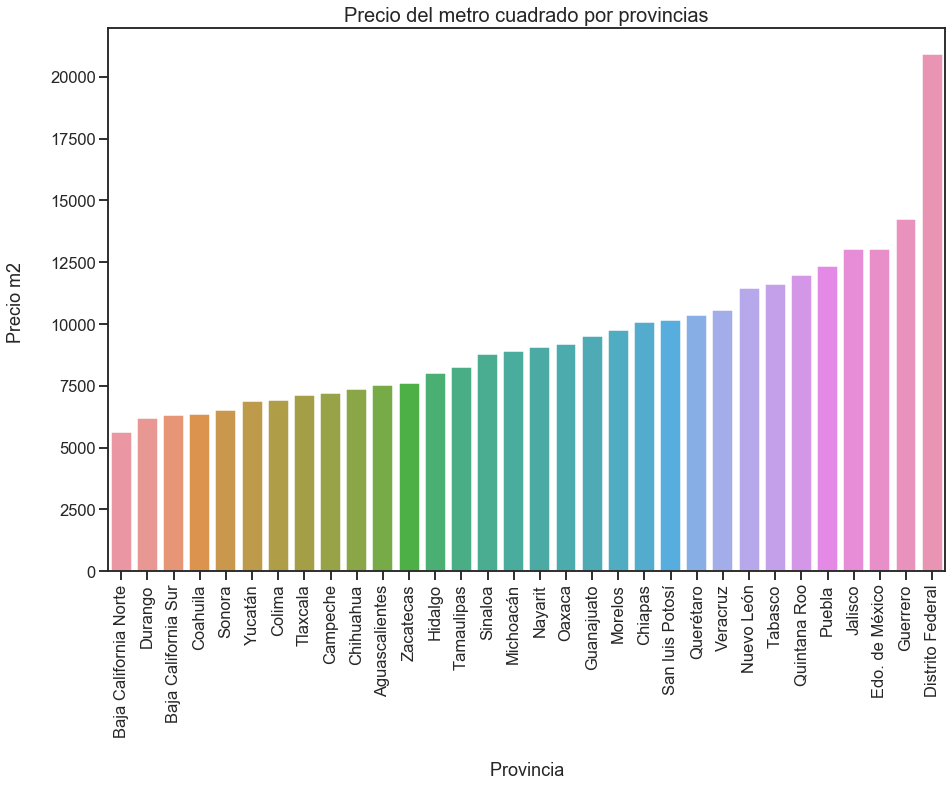

In [15]:


plt.figure(figsize=(15,10))

df2 = df.copy()



df_provs = df2.groupby('provincia').precio_m2.mean().reset_index()

df_provs.sort_values(by='precio_m2', inplace=True)

df_provs = df_provs.reset_index(drop=True)

df_provs['provincia'] = df_provs['provincia'].astype(str)


ax = sns.barplot(data=df_provs, x='provincia', y='precio_m2')

ax.set_title('Precio del metro cuadrado por provincias', fontdict={'fontsize':20})
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.set_xlabel('\n Provincia ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

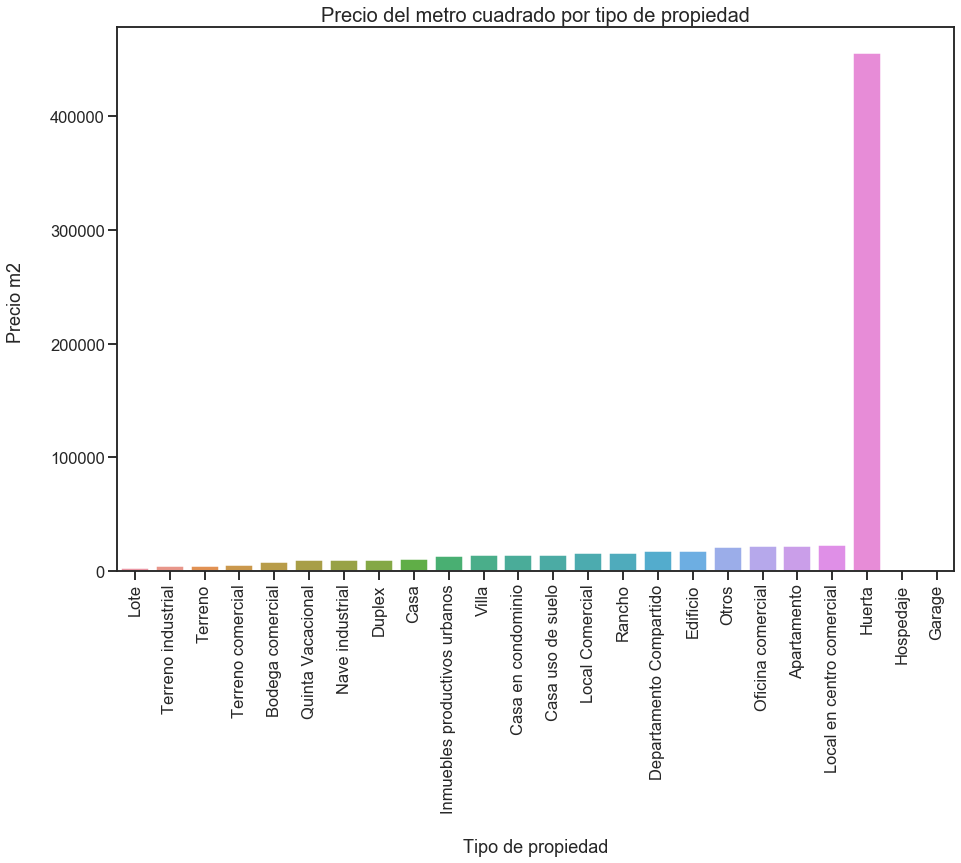

In [16]:
plt.figure(figsize=(15,10))

df2 = df.copy()



df_provs = df2.groupby('tipodepropiedad').precio_m2.mean().reset_index()

df_provs.sort_values(by='precio_m2', inplace=True)

df_provs = df_provs.reset_index(drop=True)

df_provs['tipodepropiedad'] = df_provs['tipodepropiedad'].astype(str)


ax = sns.barplot(data=df_provs, x='tipodepropiedad', y='precio_m2')

ax.set_title('Precio del metro cuadrado por tipo de propiedad', fontdict={'fontsize':20})
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.set_xlabel('\n Tipo de propiedad ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [17]:
df[df.tipodepropiedad=='Lote']

,titulo,descripcion,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,precio_dolar,extras
id,,,,,,,,,,,,,,,,,,,,,
257049,"terreno / lote en venta, alvarado, veracruz",chatea con nosotros para conocer mas sobre est...,Lote,Alvarado,Veracruz,0.00,0.00,0.00,0.00,0.00,...,2014-12-14,False,False,False,False,False,781704.00,3908.52,40005.32,0.00
169168,terreno/lote - paseo ex hacienda barbosa,"oportunidad de terreno, plano, con servicio de...",Lote,Zinacantepec,Edo. de México,0.00,0.00,0.00,0.00,0.00,...,2016-05-09,False,False,False,False,False,702100.00,1700.00,35931.42,0.00
104078,terreno/lote - privada de rio nasas,excelente opción de terreno para las familias ...,Lote,Metepec,Edo. de México,0.00,0.00,0.00,0.00,0.00,...,2016-05-09,False,False,False,False,False,500000.00,2415.46,25588.54,0.00
136796,terreno/lote - 3er. cerrada de juan escutia,bonito terreno ubicado en una zona de crecimie...,Lote,Toluca,Edo. de México,0.00,0.00,0.00,0.00,0.00,...,2016-05-10,False,False,False,False,False,510000.00,1508.88,26100.31,0.00


ANALISIS POR CIUDAD Y/O PROVINCIA

In [18]:
df_ciudades = df.groupby(['ciudad','tipodepropiedad']).agg({'precio_m2':'mean'})
df_ciudades

precio_m2
ciudad    tipodepropiedad              
Abalá     Apartamento               nan
          Bodega comercial          nan
          Casa                      nan
          Casa en condominio        nan
          Casa uso de suelo         nan
...                                 ...
ZirAndaro Terreno comercial         nan
          Terreno industrial        nan
          Villa                     nan
          Hospedaje                 nan
          Garage                    nan

[21000 rows x 1 columns]

In [19]:
top_3_provincias_mas_pobladas = df.groupby('provincia').size().sort_values(ascending=False)[0:3]
top_3_provincias_mas_pobladas = list(top_3_provincias_mas_pobladas.index)
plt.figure(figsize=(20, 10))

df_provincias = df.groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})

df_provincias = df_provincias.reset_index()
df_provincias

,provincia,tipodepropiedad,precio_m2
0,Aguascalientes,Apartamento,11327.65
1,Aguascalientes,Bodega comercial,6781.35
2,Aguascalientes,Casa,7441.10
3,Aguascalientes,Casa en condominio,9277.79
4,Aguascalientes,Casa uso de suelo,8037.66
...,...,...,...
763,Zacatecas,Terreno comercial,8695.65
764,Zacatecas,Terreno industrial,nan
765,Zacatecas,Villa,nan
766,Zacatecas,Hospedaje,nan


<Figure size 1440x720 with 0 Axes>

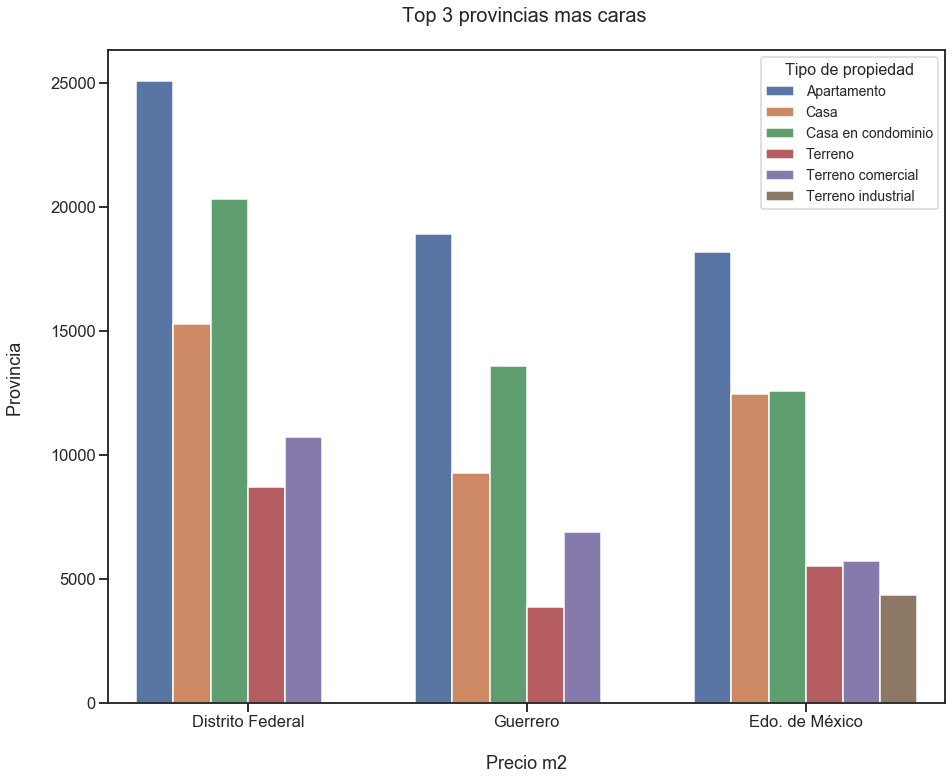

In [20]:
top_3_provincias_mas_caras = df.groupby('provincia').agg({'precio_m2':'mean'}).sort_values(by='precio_m2',ascending=False)[0:3]
top_3_provincias_mas_caras = list(top_3_provincias_mas_caras.index)
plt.figure(figsize=(15, 12))

df_provincias = df.groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})

df_provincias = df_provincias.reset_index()

df_provincias = df_provincias.loc[df_provincias['tipodepropiedad'].isin(['Apartamento','Casa','Casa en condominio','Terreno','Terreno comercial','Terreno industrial']), :]
df_provincias.tipodepropiedad.cat.remove_unused_categories(inplace=True)

df_provincias.rename(columns={'tipodepropiedad':'Tipo de propiedad'}, inplace=True)

ax = sns.barplot(data=df_provincias, x='provincia', y='precio_m2', hue='Tipo de propiedad', order=top_3_provincias_mas_caras)

ax.set(xlabel='\n Provincia ', ylabel='Precio m2 \n')
ax.set_title('Top 3 provincias mas caras \n', fontdict={'fontsize':20})
ax.set_xlabel('\n Precio m2 ', fontsize=18)
ax.set_ylabel('Provincia \n', fontsize=18)
plt.legend(title='Tipo de propiedad', title_fontsize=16, fontsize=14)
plt.show()


# Este grafico esta de mas ya qe dice lo mismo que el de abajo. Deberia hacer alguno con las ciudades


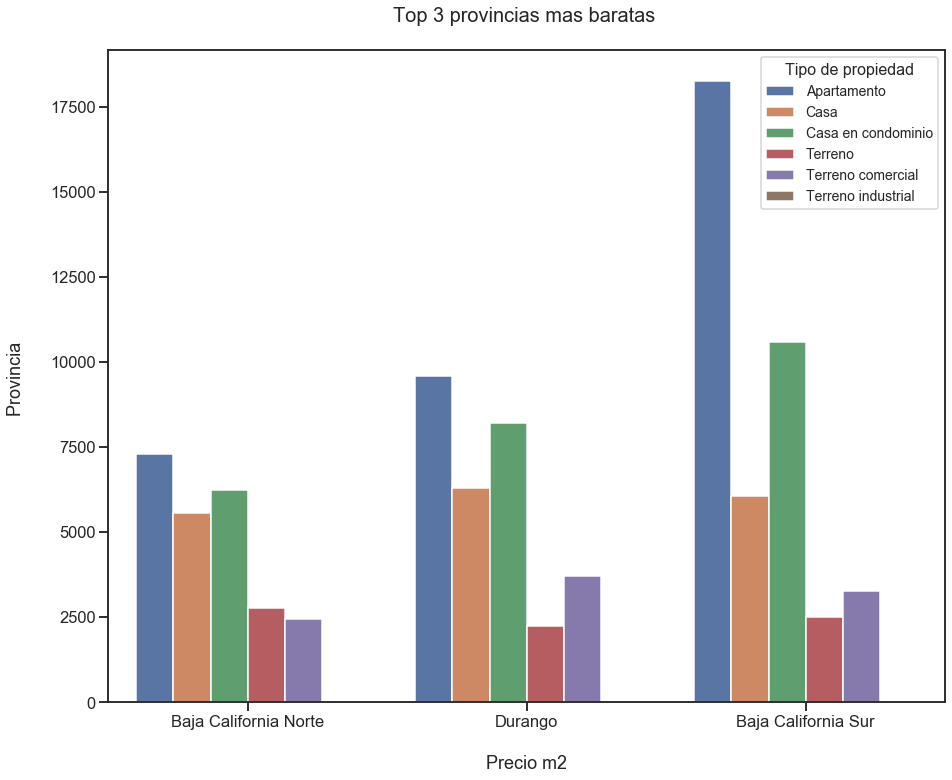

In [21]:
top_3_provincias_mas_caras = df.groupby('provincia').agg({'precio_m2':'mean'}).sort_values(by='precio_m2',ascending=True)[0:3]
top_3_provincias_mas_caras = list(top_3_provincias_mas_caras.index)
plt.figure(figsize=(15, 12))

df_provincias = df.groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})

df_provincias = df_provincias.reset_index()

df_provincias = df_provincias.loc[df_provincias['tipodepropiedad'].isin(['Apartamento','Casa','Casa en condominio','Terreno','Terreno comercial','Terreno industrial']), :]
df_provincias.tipodepropiedad.cat.remove_unused_categories(inplace=True)

df_provincias.rename(columns={'tipodepropiedad':'Tipo de propiedad'}, inplace=True)

ax = sns.barplot(data=df_provincias, x='provincia', y='precio_m2', hue='Tipo de propiedad', order=top_3_provincias_mas_caras)

ax.set(xlabel='\n Provincia ', ylabel='Precio m2 \n')
ax.set_title('Top 3 provincias mas baratas \n', fontdict={'fontsize':20})
ax.set_xlabel('\n Precio m2 ', fontsize=18)
ax.set_ylabel('Provincia \n', fontsize=18)
plt.legend(title='Tipo de propiedad',title_fontsize=16, fontsize=14, loc='upper right')
plt.show()



In [22]:
# Voy a intentar primero, tener una nocion de como se distribuyen los datos respecto a la antiguedad.
# Se me ocurre un scatter plot de precio y antiguedad pero por categorias (tipos de propiedad)
df.groupby('provincia').describe()['precio_m2'][['count','mean']].sort_values(by='mean')

,count,mean
provincia,,
Baja California Norte,2903.00,5650.61
Durango,2035.00,6194.25
Baja California Sur,1470.00,6306.52
Coahuila,3136.00,6363.14
Sonora,2539.00,6530.37
Yucatán,5474.00,6901.21
Colima,791.00,6932.02
Tlaxcala,714.00,7121.56
Campeche,169.00,7201.78


c:\users\gaston.parente\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


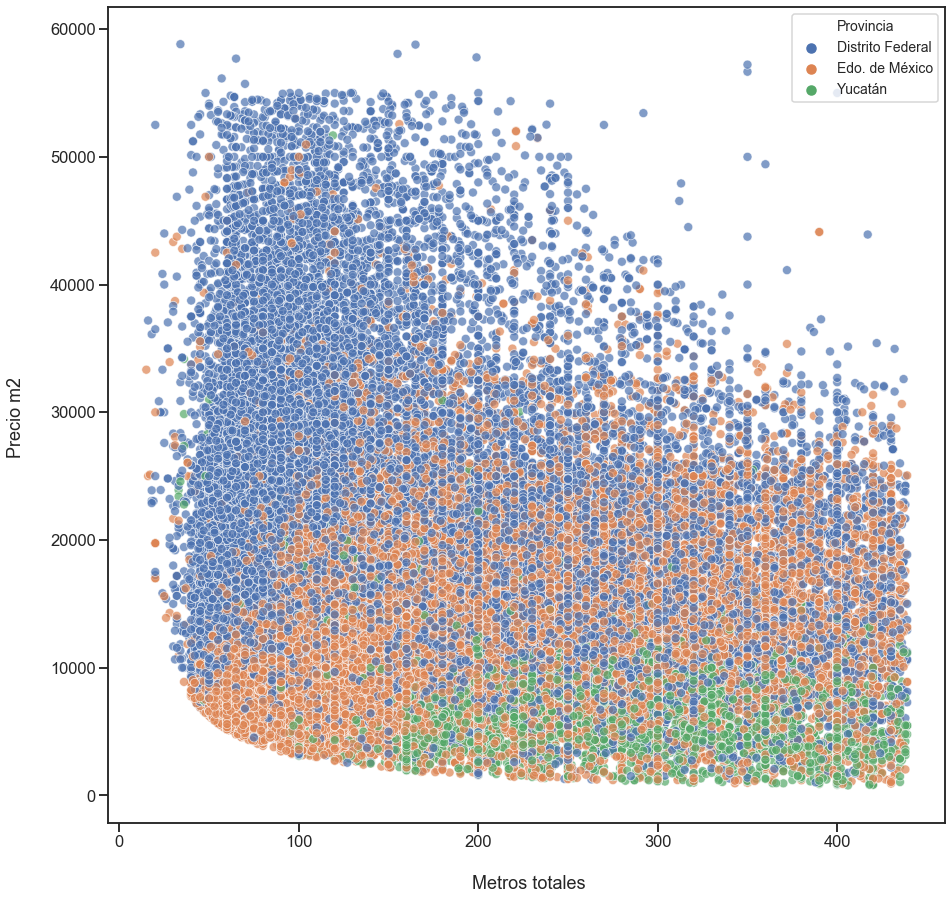

In [23]:
# De lo visto anterior, selecciono tres provincias representativas. Distrito Federal, Coahuila y Yucatán
# Con buen caudal de gente, y con promedios de precios por metro cuadrado distintos.
plt.figure(figsize=(15,15))

data = df[df['provincia'].isin(['Distrito Federal', 'Edo. de México' ,'Yucatán'])]
data = data[df['precio_m2']<=100000]
data.provincia.cat.remove_unused_categories(inplace=True)
data.rename(columns={'provincia':'Provincia'}, inplace=True)

ax = sns.scatterplot(y='precio_m2', x='metrostotales', data=data, hue='Provincia', alpha=0.7)


ax.set_xlabel('\n Metros totales', fontsize=18)
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.legend(title_fontsize=16, fontsize=14)


# Este scatter plot revela un monton de informacion:
# Primer dato interesante: 
# Las propiedades de mayor valor por metro cuadrado, suelen ser las mas chicas, y las 
# propiedades de menor valor por metro cuadrado, suelen ser las mas grandes.
# Segundo dato curioso: 
# Se puede ver como en Distrito Federal, abundan las propiedades chicas y caras, mientras que en Yucatan hay muchas 
# mas propiedades grandes y con menos valor por metro cuadrado.
# En estado de mexico las casas chicas parecen ser mas baratas que en yucatan y distrito.
# Aca si podria llegar a servir agrupar varias provincias en una para de esa forma poder entender mejor e incluir 
# mucha mas cantidad de datos


Text(103.42187499999999, 0.5, '')

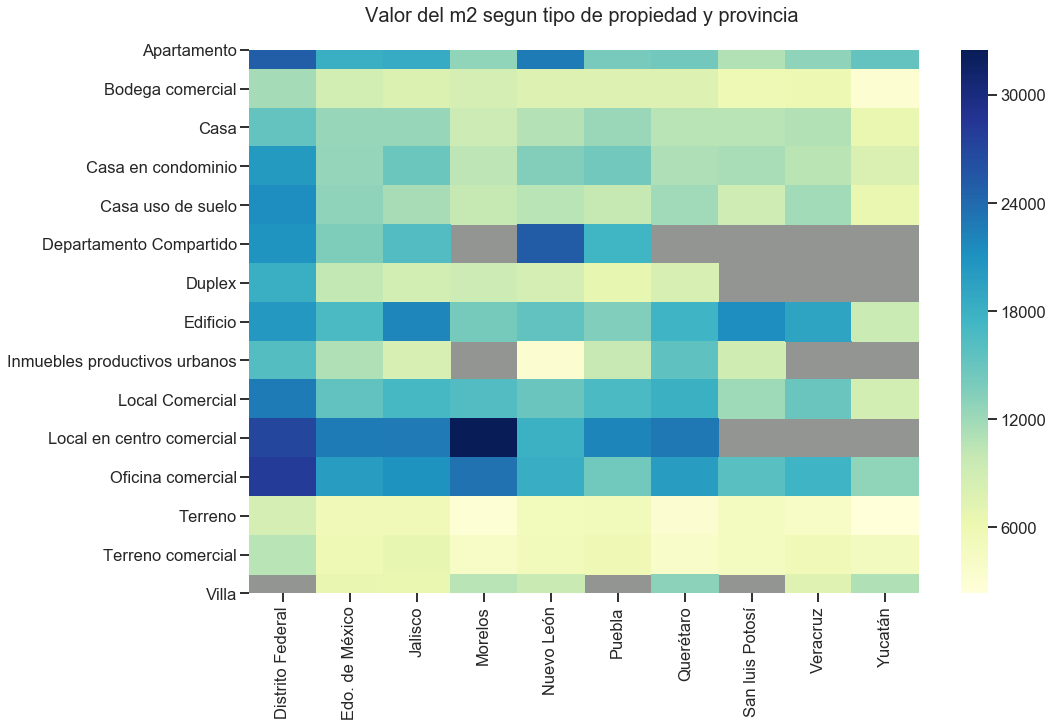

In [24]:
# Se tomn las 10 provincias con mas casas y los 20 tipos de propiedades mas comunes.
# Se evalua el precio del metro cuadrado para cada tipo de propiedad en una provincia distinta

top_10_provincias_mas_pobladas = df.groupby('provincia').size().sort_values(ascending=False)[0:10]
top_10_provincias_mas_pobladas = list(top_10_provincias_mas_pobladas.index)

top_15_tipos_mas_comunes = df.groupby('tipodepropiedad').size().sort_values(ascending=False)[0:15]
top_15_tipos_mas_comunes = list(top_15_tipos_mas_comunes.index)

plt.figure(figsize=(15,10))
data = df.groupby(['provincia','tipodepropiedad']).filter(lambda x: len(x)>1).groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})
data = data.reset_index()

data = data.loc[data['provincia'].isin(top_10_provincias_mas_pobladas),:]
data = data.loc[data['tipodepropiedad'].isin(top_15_tipos_mas_comunes),:]

data.tipodepropiedad.cat.remove_unused_categories(inplace=True)
data.provincia.cat.remove_unused_categories(inplace=True)

pivot = data.pivot(index='tipodepropiedad', columns='provincia', values='precio_m2')

mask = pivot.isnull()
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
ax = sns.heatmap(pivot, cmap="YlGnBu")
ax.set_facecolor('xkcd:grey')
ax.set_title('Valor del m2 segun tipo de propiedad y provincia \n', fontdict={'fontsize':20})
ax.set_xlabel('')
ax.set_ylabel('')

# Los grises, son missing values

# Este heatmap revela mucha informacion:
# Ranchos, oficinas y locales, son los mas caros
# Los apartamentos, son mas caros que las casas (raro)
# Distrito Federal, es mas caro que el resto
# Ademas, permite ver la variacion del precio segun el lugar y el tipo.
# Dudas. Esta bien dejar los missing values? o deberia sacar esas categorias?
# Podria mostrar mas informacion, pero los missing values crecen considerablemente

In [25]:
pivot

provincia,Distrito Federal,Edo. de México,Jalisco,Morelos,Nuevo León,Puebla,Querétaro,San luis Potosí,Veracruz,Yucatán
tipodepropiedad,,,,,,,,,,
Apartamento,25051.71,18181.27,18513.72,12819.03,22774.90,14019.38,14461.44,11038.96,12868.18,15286.56
Bodega comercial,11757.87,8775.94,7904.72,8625.00,7664.26,7684.38,7733.61,5636.41,6087.22,3140.05
Casa,15277.09,12422.86,12425.25,9346.15,10875.39,12309.32,10621.93,10641.67,10973.96,6535.46
Casa en condominio,20315.85,12565.30,14918.14,10440.86,13528.72,14383.59,11275.38,11514.00,10539.55,8022.47
Casa uso de suelo,21359.53,12871.20,11629.38,9886.35,10625.17,9902.76,11979.17,9239.56,11875.30,6520.42
Departamento Compartido,20939.89,13760.26,16465.19,nan,25197.44,17448.17,nan,nan,nan,nan
Duplex,18165.40,10086.02,8713.60,9342.63,8642.84,6782.16,8307.47,nan,nan,nan
Edificio,20406.68,16805.73,21922.51,14132.10,15522.84,13566.89,17604.22,21355.57,19312.17,9491.58
Inmuebles productivos urbanos,16294.58,11092.17,8313.72,nan,3194.62,9827.85,15619.82,9079.66,nan,nan


In [26]:
len(list(df['tipodepropiedad'].value_counts().index))

24

In [27]:
df.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'ciudad', 'provincia',
       'antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos',
       'metrostotales', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio', 'precio_m2',
       'precio_dolar', 'extras'],
      dtype='object')

In [28]:
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

In [29]:
df.groupby(['año','mes']).size()

año   mes
2012  1       1020
      2        890
      3        710
      4        944
      5       1262
      6        984
      7       1296
      8       2481
      9       1690
      10      1970
      11       950
      12       907
2013  1       1298
      2        877
      3       1105
      4       1230
      5       1385
      6       1337
      7       1653
      8       1647
      9       2301
      10      2728
      11      2722
      12      2178
2014  1       1608
      2       1736
      3       2057
      4       1957
      5       2183
      6       2187
      7       2272
      8       2538
      9       2861
      10      2772
      11      3506
      12      3346
2015  1       3210
      2       2874
      3       2933
      4       2845
      5       2710
      6       2788
      7       2827
      8       3401
      9       3625
      10      4130
      11      3572
      12      3207
2016  1       4248
      2       3323
      3       3633
      4       4606
  

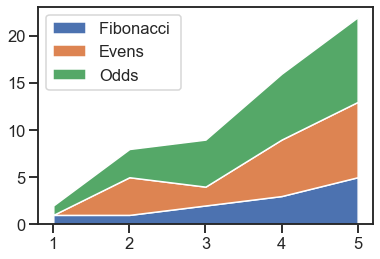

In [30]:
# Ya se me va a ocurrir algo con el diagrama de area

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()


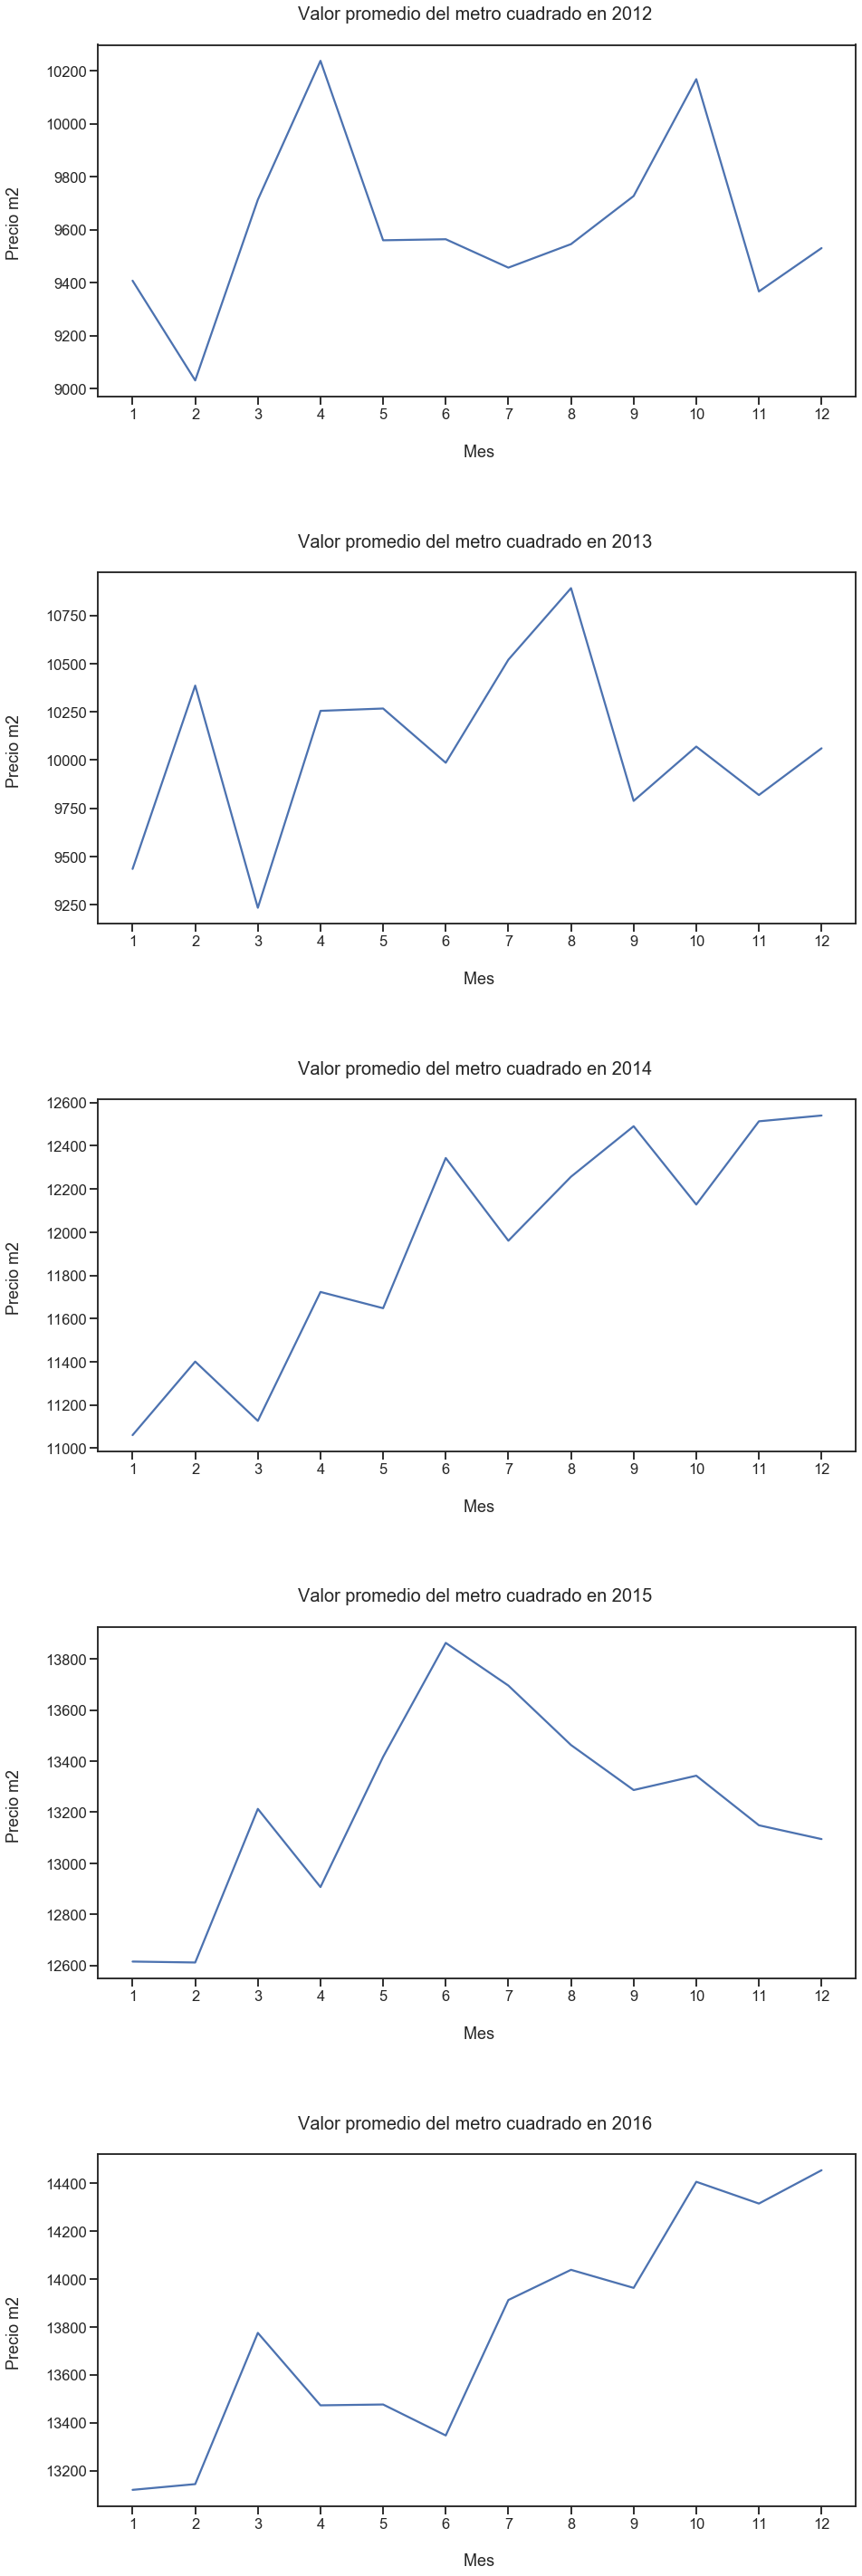

In [31]:
# Como fue variando el precio del metro cuadrado en pesos mexicanos a lo largo de los años?
df2 = df.copy()
df2 = df2.groupby(['año','mes']).agg({'precio_m2':'mean'})
df2 = df2.reset_index()

fig,ax1 = plt.subplots(5,1, figsize=(15,50))
i = 0
plt.setp(ax1, xticks=[1,2,3,4,5,6,7,8,9,10,11,12])
fig.subplots_adjust(hspace=0.5)

for año in [2012,2013,2014,2015,2016]: 
    ax1[i].set_xlabel("\n Mes",fontsize=18)
    ax1[i].set_ylabel("Precio m2 \n",fontsize=18)
    ax1[i].plot(df2[(df2.año==año)].mes,\
            df2[(df2.año==año)].precio_m2,\
            label=name)
    ax1[i].set_title('Valor promedio del metro cuadrado en {} \n'.format(año), fontsize=20)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    i += 1

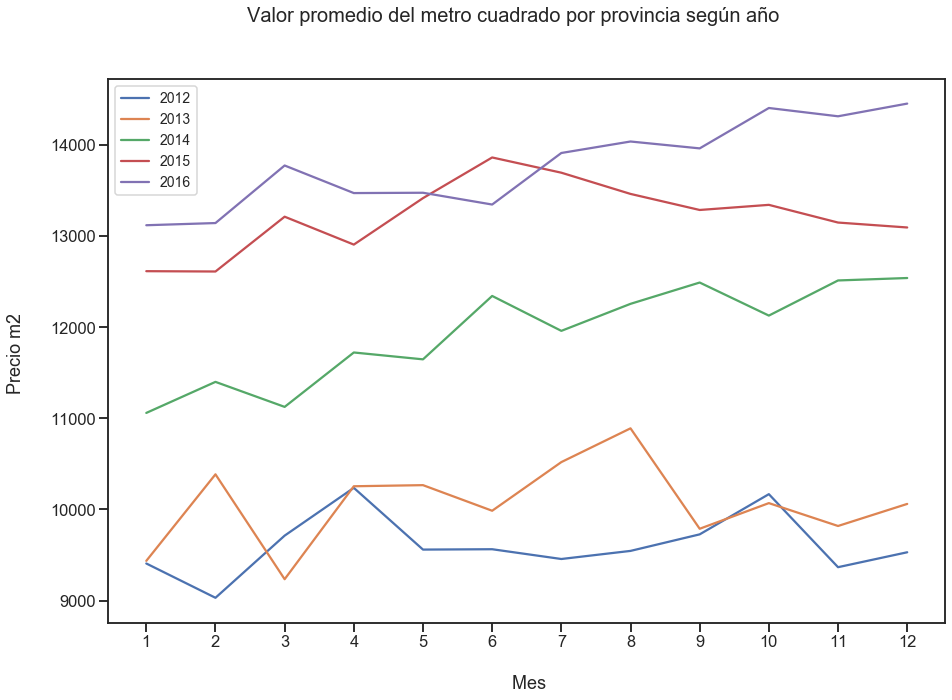

In [32]:
# Como fue variando el precio del metro cuadrado en pesos mexicanos a lo largo de los años?

df2 = df.copy()

df2 = df2.groupby(['año','mes']).agg({'precio_m2':'mean'})

df2 = df2.reset_index()

fig,ax1 = plt.subplots(1,1, figsize=(15,10))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado por provincia según año',fontsize=20)

for año in [2012,2013,2014,2015,2016]:
    
    ax1.plot(df2[(df2.año==año)].mes,\
            df2[(df2.año==año)].precio_m2,\
            label=año)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])    
ax1.set_xlabel("\n Mes", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', title_fontsize=16, fontsize=14)


# De este grafico se observa:
# Este grafico son todos los anteriores juntos.
# Las 5 lineas, respectivas a cada año, son casi paralelas, y salvo 2013 (se mantiene), todas incrementan.
# Esto nos da la pauta de que año a año los valores de las propiedades, van subiendo.

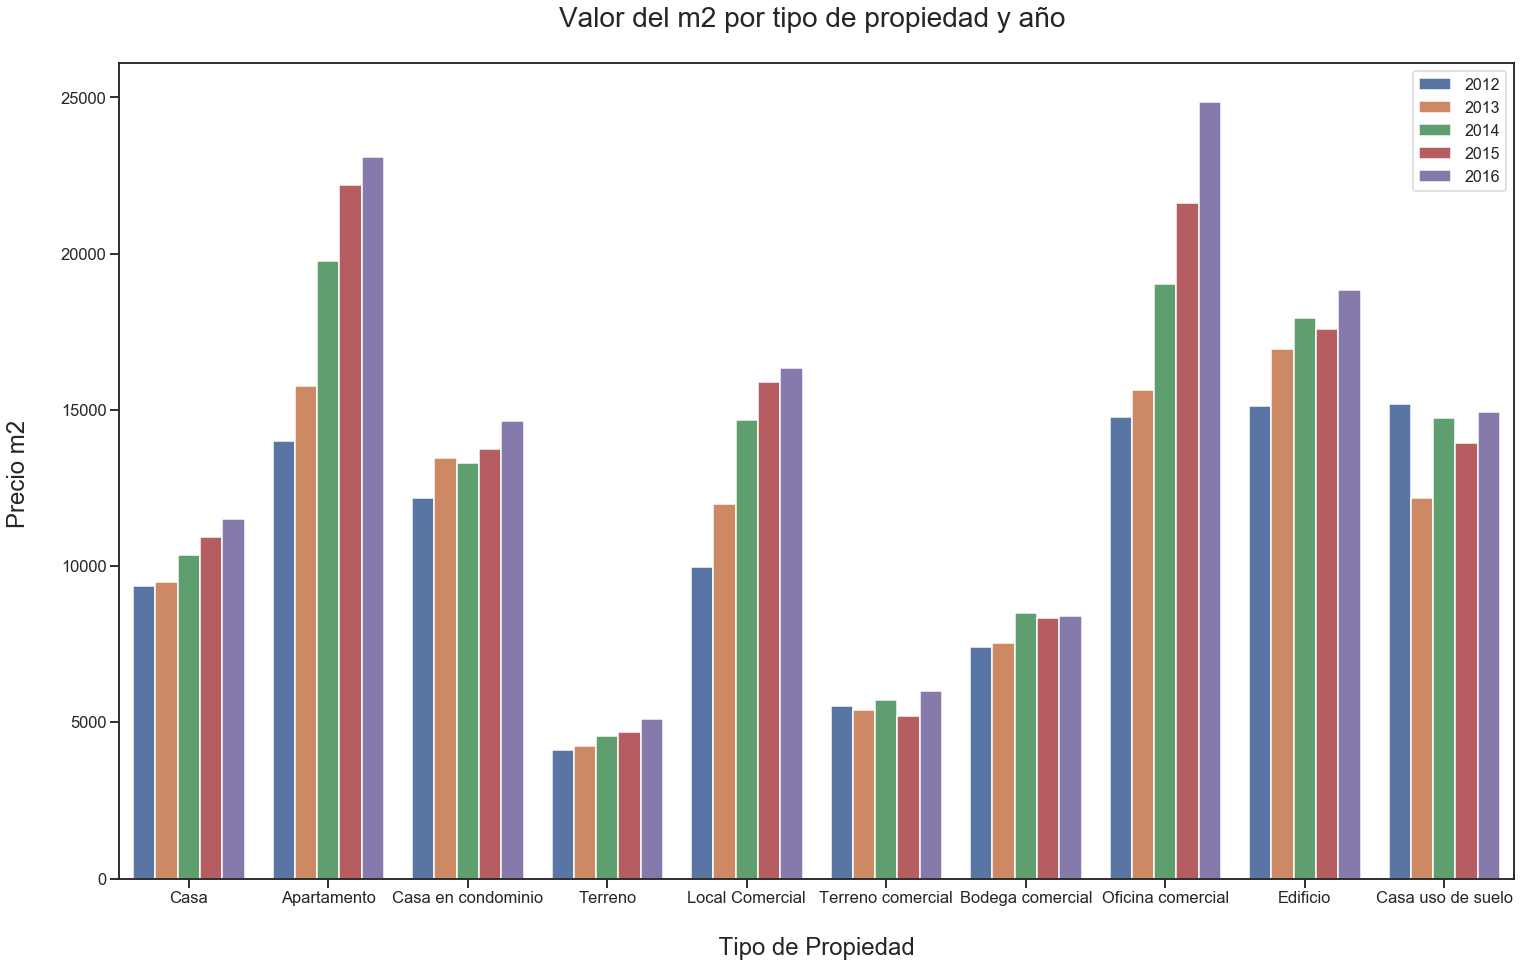

In [33]:
# Y si tomo en cuenta los tipos de propiedades. Todas fueron subiendo de precio? O como se comportaron?
# Filtro para asegurarme de que los grupos que tomo sean de mas de 20 casas

df_años = df.groupby(['año','tipodepropiedad']).filter(lambda x: len(x)>20).groupby(['año','tipodepropiedad']).agg({'precio_m2':'mean'})
top_5_tipos_mas_comunes = df.groupby('tipodepropiedad').size().sort_values(ascending=False)[0:10]
top_5_tipos_mas_comunes = list(top_5_tipos_mas_comunes.index)
plt.figure(figsize=(25, 15))

df_años = df_años.reset_index()

df_años = df_años.loc[df_años['tipodepropiedad'].isin(top_5_tipos_mas_comunes), :]
df_años.tipodepropiedad.cat.remove_unused_categories(inplace=True)

df_años.rename(columns={'tipodepropiedad':'Tipo de propiedad'}, inplace=True)

ax = sns.barplot(data=df_años, x='Tipo de propiedad', y='precio_m2', hue='año', order=top_5_tipos_mas_comunes)

ax.set_xlabel('\n Tipo de Propiedad ', fontsize=24)
ax.set_ylabel('Precio m2 \n', fontsize=24)
ax.set_title('Valor del m2 por tipo de propiedad y año \n', fontdict={'fontsize':28})
ax.legend(loc='best', title_fontsize=18, fontsize=16)
plt.show()

# El grafico muestra, para cada tipo de propiedad y para cada año, como fue variando el precio.
# En todos los casos sube, a excepcion del Terreno Comercial, que, por alguna razon que desconozco, en 2012
# tenia un valor altisimo. Esta anomalía quizas es algo para mirar detenidamente.

# Quizas esto es algo que podriamos ver si, en dolares, tambien subio. Porque puede que sea simplemente por la inflacion
# del peso mexicano


In [34]:
# Existe alguna relacion entre los metros cuadrados de las casas y los años? La idea seria ver si se da que las casas menos antiguas son mas chicas